In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data.tsv file
data = pd.read_csv('filtered_data_labeled.tsv', sep='\t')

Bin range: 1.00 - 2.00, Count: 32362
Bin range: 2.00 - 2.99, Count: 161137
Bin range: 2.99 - 3.99, Count: 22848
Bin range: 3.99 - 4.98, Count: 3006
Bin range: 4.98 - 5.98, Count: 894
Bin range: 5.98 - 6.98, Count: 559
Bin range: 6.98 - 7.97, Count: 364
Bin range: 7.97 - 8.97, Count: 251
Bin range: 8.97 - 9.96, Count: 153
Bin range: 9.96 - 10.96, Count: 103
Bin range: 10.96 - 11.96, Count: 74
Bin range: 11.96 - 12.95, Count: 62
Bin range: 12.95 - 13.95, Count: 44
Bin range: 13.95 - 14.95, Count: 45
Bin range: 14.95 - 15.94, Count: 29
Bin range: 15.94 - 16.94, Count: 23
Bin range: 16.94 - 17.93, Count: 19
Bin range: 17.93 - 18.93, Count: 13
Bin range: 18.93 - 19.93, Count: 10
Bin range: 19.93 - 20.92, Count: 7
Bin range: 20.92 - 21.92, Count: 3
Bin range: 21.92 - 22.91, Count: 3
Bin range: 22.91 - 23.91, Count: 5
Bin range: 23.91 - 24.91, Count: 4
Bin range: 24.91 - 25.90, Count: 5
Bin range: 25.90 - 26.90, Count: 2
Bin range: 26.90 - 27.89, Count: 3
Bin range: 27.89 - 28.89, Count: 1
Bi

C:\Users\adham\AppData\Local\Temp\ipykernel_8960\3984265228.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['up_votes-down_votes'].replace([np.inf, -np.inf], np.nan, inplace=True)


<Axes: title={'center': 'up_votes-down_votes'}, ylabel='Frequency'>

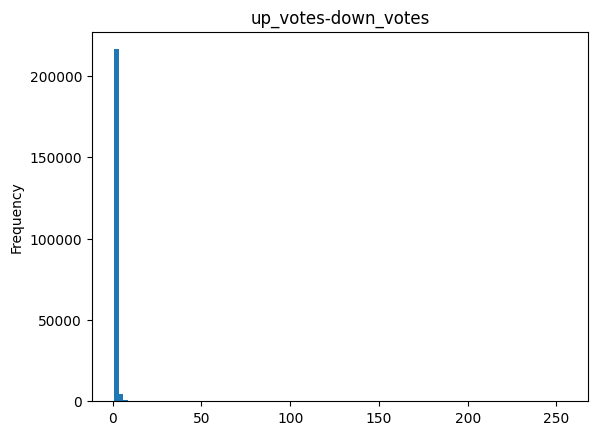

In [8]:
# plot count of each unique label for each column (up_votes	down_votes	age	gender	accent	label)
# up_votes divided by down_votes
# Handle infinite values caused by division by zero
data['up_votes-down_votes'] = data['up_votes'] - data['down_votes']
data['up_votes-down_votes'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in 'up_votes-down_votes' or handle them as needed
data['up_votes-down_votes'].dropna(inplace=True)

# Plot the histogram
counts, bins = np.histogram(data['up_votes-down_votes'].dropna(), bins=255)

# Print the counts in each bin
for i in range(len(bins) - 1):
    print(f"Bin range: {bins[i]:.2f} - {bins[i+1]:.2f}, Count: {counts[i]}")

# Plot the histogram
data['up_votes-down_votes'].plot(kind='hist', bins=100, title='up_votes-down_votes')


In [9]:
# get worst rated row
worst_rated_row = data.loc[data['up_votes-down_votes'].idxmin()]
print(worst_rated_row)

client_id              5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...
path                                        common_voice_en_19687170.mp3
sentence                                He associated with the Formists.
up_votes                                                               2
down_votes                                                             1
age                                                              fifties
gender                                                            female
accent                                                                us
label                                                                  3
up_votes/down_votes                                                  2.0
up_votes-down_votes                                                    1
Name: 0, dtype: object


In [2]:
# drop all columns except path and label
data = data[['path', 'label']]
# remove duplicate paths rows
data = data.drop_duplicates(subset=['path'])
# remove rows with empty paths
data = data[data['path'].notna()]
# remove rows with empty labels
data = data[data['label'].notna()]


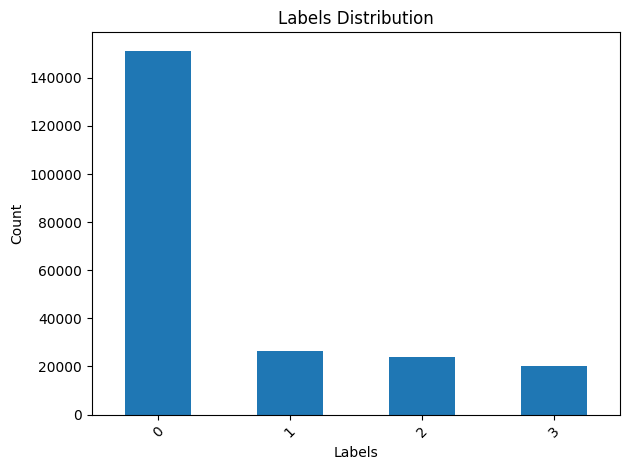

In [3]:
## plot the classes distribution
# get the unique labels and their counts
labels = data['label'].value_counts()
# plot the labels distribution
labels.plot(kind='bar', title='Labels Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Clearly, the data is biased (class imbalance), around 70% of the examples belong to class 0.
To solve this problem we have to balance the dataset. We can do this by oversampling the minority class or undersampling the majority class.